# 第２章 線形回帰モデル

## Abstract
本章では線形回帰モデルを通じてモデリングの基礎概念について述べる。

* モデリング：モデルの想定 → モデルのパラメータ推定 → モデルの評価と選択 のモデルの構築の一連のプロセスのこと
* 回帰モデル：現象の結果とそれに影響を及ぼすと考えられる複数の要因とを結ぶつけるモデル

## 2変数間の関係を捉える
### データとモデル

#### データ：バネに加えた力とバネの長さ

In [84]:
import pandas as pd
data = pd.DataFrame({
        "weight" : [i for i in range(5,55,5)],
        "length" : [5.4, 5.7, 6.9, 6.4, 8.2, 7.7, 8.4, 10.1, 9.9, 10.5]
    })
data

,length,weight
0,5.4,5
1,5.7,10
2,6.9,15
3,6.4,20
4,8.2,25
5,7.7,30
6,8.4,35
7,10.1,40
8,9.9,45
9,10.5,50


#### モデル
##### 線形モデル
$$
y = u(x) + \beta_0 + \beta_1 x
$$

ここに誤差の影響を考慮すると。
##### 線形回帰モデル
$$
y_i = u(x) + \beta_0 + \beta_1 x_i + \epsilon_i
$$

### モデルの推定

#### 最小二乗法
各実験点での誤差の二条派を最初にするように回帰係数の値を決定する方法<br>

誤差の二乗和 $S(\beta_0, \beta_1) \equiv \sum_{i=1}^{n} \{y_i - (\beta_0 + \beta_1 x_i)\}^2$
を最小にする回帰係数を求める。<br>
実際、上の式を$\beta_0,\beta_1$に対して偏微分した式を0とおくことで最小二乗推定値$\hat\beta_0,\hat\beta_1$が求める。

In [85]:
# SymPy は Python の代数計算ライブラリです.
from sympy import *
init_session()

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [86]:
b0, b1 = symbols("b0 b1")

j = (y - (b1 * x + b0)) ** 2

In [87]:
j_b0 = diff(j, b0)

In [88]:
j_b1 = diff(j, b1)

In [103]:
sum_b0 = sum([j_b0.subs([(x, point[1]["weight"]), (y, point[1]["length"])]) for point in data.iterrows()]) / 2.
sum_b1 = sum([j_b1.subs([(x, point[1]["weight"]), (y, point[1]["length"])]) for point in data.iterrows()]) / 2.

In [188]:
b = solve([sum_b0, sum_b1], [b0, b1])
b

Plotすると、

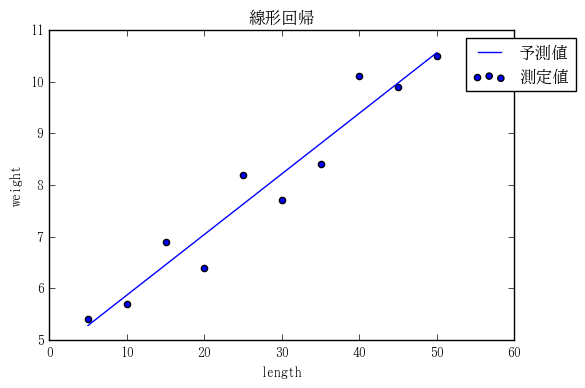

In [191]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data["weight"], [b[b0] + b[b1]*expected for expected in list(data["weight"])], label='予測値')
plt.scatter(data["weight"], data["length"], label='測定値')
plt.title('線形回帰')
plt.ylabel('weight')
plt.xlabel('length')
plt.legend(bbox_to_anchor=(1.15, 1.0))
plt.show()

#### 最尤法
各実験点で観測されるデータはある確率分布に従って得られるものであるという過程の基に観測されたデータが得られる確率を最大化するような回帰係数を推定する方法。<br>
データを計測することでヒストグラムが得られる。現象の起こる確率の分布を示したヒストグラムを近似する数理的なモデルが確率分布モデルである。<br>
代表的な確率分布は正規分布。<br>
これを導入することで、実験点$x_i$での観測データ$y_i$は確率変数$Y_i$の実現値であり、平均$\mu_i$、分散$\sigma^2$の正規分布
$$
f(y_i|x_i;\mu_i,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\{- \frac{(y_i - \mu_i)^2}{2\sigma^2}\}
$$
に従って観測されたと考える。<br>
ただし、$E[Y_i|x_i] = \mu_i$

線形回帰モデルとは、各点での真の値が直線状に並ぶと仮定しとたモデルであり、$\mu_i = \beta_0 + \beta_1 x_i$が成り立つ。これを代入することで、
$$
f(y_i|x_i;\beta_0,\beta_1,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\{- \frac{\{y_i - (\beta_0 + \beta_1 x_i)\}^2}{2\sigma^2}\}
$$となる。

これは、実験点$x_i$で真の値$\beta_0 + \beta_1 x_i$の周りで観測されるデータ$y_i$が確率分布$f(y_i|x_i;\beta_0,\beta_1,\sigma^2)$に従うとき、$y_i$がどの程度の尤もらしさで出現するかを表し、この値を尤度という。

n個の観測データがお互いに独立であると仮定すると、n個のデータに関する尤度はそれぞれの尤度の積で与えられる。<br>
尤度関数は以下の形となる。
$$L(\beta_0, \beta_1, \sigma^2)\equiv \Pi_{i=i}^{n} f(y_i|x_i;\beta_0,\beta_1,\sigma^2)$$


最尤法はこの尤度関数を最大とするパラメータの値を求める方法で、求まった値は最尤推定値と呼ばれる。計算上便利のため対数うゆう度関数の最大化によって計算を行う場合が多い。

$$l(\beta_0, \beta_1, \sigma^2) \equiv L(\beta_0, \beta_1, \sigma^2)= \Pi_{i=i}^{n} f(y_i|x_i;\beta_0,\beta_1,\sigma^2)$$

計算すると、データの出方に正規分布を仮定した時の回帰係数の最尤推定値は最小二乗推定値と一致することがわかる。

## 多変数間の関係を捉える
### データとモデル

In [217]:
import numpy as np
import scipy as sp

以下のように訓練データを生成。np.random.normal(0,0.1)がノイズを与える。

In [216]:
data = pd.DataFrame({
        "物質の量" : [(28.7 + (65.8 - 28.7)/85*i)+np.random.normal(0,0.1) for i in range(86)],
        "温度" : [(34.1 + (52.6 - 34.1)/85*i)+np.random.normal(0,0.1) for i in range(86)],
        "圧力" : [(2.3 + (4.8 - 2.3)/85*i)+np.random.normal(0,0.1) for i in range(86)],
        "pH" : [(6.4 + (7.8 - 6.4)/85*i)+np.random.normal(0,0.1) for i in range(86)],
        "触媒量" : [(0.1 + (1.1 - 0.1)/85*i)+np.random.normal(0,0.1) for i in range(86)]
    })
data.head(5)

,pH,圧力,温度,物質の量,触媒量
0,6.489631,2.275273,34.214349,28.557257,0.095593
1,6.646057,2.529821,34.387778,29.076267,0.048429
2,6.301737,2.217674,34.573531,29.589207,0.099807
3,6.286062,2.423196,34.710146,30.103095,0.069227
4,6.532465,2.447980,35.005273,30.271071,0.188184


線形重回帰モデルを用いてこの観測データから物質の量$y$と複数の要因を結びつけるモデルを構築すること。行列表現で表すと以下のようになる。
$$
y = X\beta + \epsilon
$$
ここで、$y$は$n$次元観測値ベクトル、$X$はpこの説明変数に関するデータに片方に対応する1を付け加えた$n \times (p+1)$次元回帰係数ベクトル、$\epsilon$は$n$次元誤差ベクトルである。

### モデルの推定
#### 最小二乗法
多変量の場合、誤差の出方に以下の仮定を置くことでより強く推定の良さが保証される。
$$
E[\epsilon]\equiv (E[\epsilon_1],\cdots,E[\epsilon_n])^T = (0,\cdots,0)^T = \mathcal{0}^T
$$
$$
E[\epsilon \epsilon^T] 
\equiv\left(\begin{array}{cc} 
E[\epsilon_1^2] & E[\epsilon_1 \epsilon_2] & \cdots & E[\epsilon_1 \epsilon_n]\\
E[\epsilon_2 \epsilon_1] & E[\epsilon_2^2] & \cdots & E[\epsilon_2 \epsilon_n]\\
\vdots & \vdots & \ddots & \vdots\\
E[\epsilon_n \epsilon_1] & E[\epsilon_n \epsilon_2] & \cdots & E[\epsilon_n^2]\\
\end{array}\right) 
= \sigma^2 I_n
$$

最小二乗推定値は各実験点での誤差の二乗和を最小にする値である。その値は、以下の正規方程式を解くことで与えられる。
$$
\frac{\partial S(\beta)}{\partial \beta} 
= \frac{\partial}{\partial \beta}(y^T y - 2 y^T X \beta + \beta^T X^T X \beta)
= -2 X^T y + 2X^T X \beta
= 0
$$

$X^T X$が逆行列が存在する時、最小二乗推定値は$\hat\beta = (X^T X)^{-1}X^T y$で与えられる。

この最小二乗推定値を係数荷物式が線形回帰式である。
$$y = \hat\beta^T x$$